# Model Scaling

Visualization of how the performance scales with increased number of parameters.

Data for the other models is taken from their corresponding implementations and reported results.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
import wandb
def get_eval_summary(artifact):
    api = wandb.Api()
    artifact = api.artifact(artifact)

    runs = artifact.used_by()
    eval_runs = list(filter(lambda run: run._attrs['jobType'] == 'evaluation' and 'test/best_mpjpe' in run.summary, runs))
    return eval_runs[-1].summary

mini_summary = get_eval_summary('ppierzc/propose_human36m/mpii-prod:latest')
large_summary = get_eval_summary('ppierzc/propose_human36m/mpii-prod-large:latest')
xlarge_summary = get_eval_summary('ppierzc/propose_human36m/mpii-prod-xlarge:v26')

In [12]:
num_params = np.array([
    852546,
    3301546,
    8318741
])

test_mpjpe = np.array([
    mini_summary['test/best_mpjpe'],
    large_summary['test/best_mpjpe'],
    xlarge_summary['test/best_mpjpe']
])

hard_mpjpe = np.array([
    mini_summary['hard/best_mpjpe'],
    large_summary['hard/best_mpjpe'],
    xlarge_summary['hard/best_mpjpe']
])

occl_mpjpe = np.array([
    mini_summary['occl/best_mpjpe'],
    large_summary['occl/best_mpjpe'],
    xlarge_summary['occl/best_mpjpe']
])

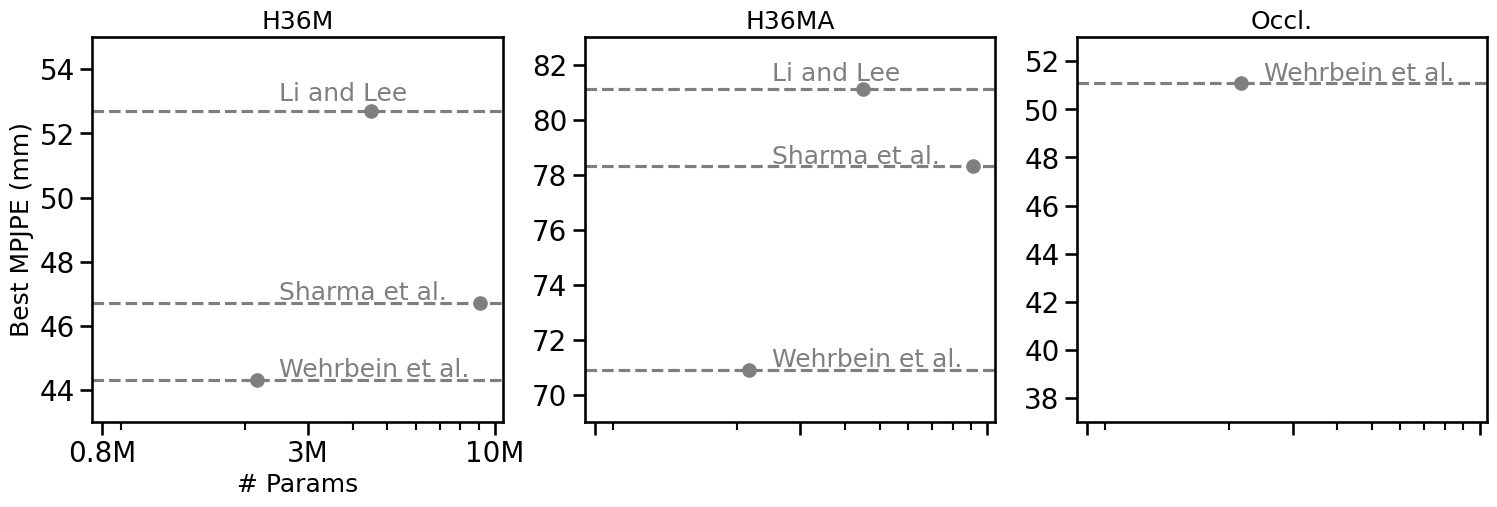

In [15]:
edgecolor = "k" #'.5'
tick_direction = "out"
plt.style.use('default')
sns.set_context('talk')
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
# plt.plot(num_params, test_mpjpe, marker='o', c='#1E88E5')
plt.xscale('log')
plt.xticks([8e5, 3e6, 1e7], ["0.8M", "3M", "10M"], fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('# Params')
plt.title('H36M')
plt.ylabel('Best MPJPE (mm)')

plt.axhline(52.7, c='tab:gray', ls='--')
plt.axhline(46.7, c='tab:gray', ls='--')
plt.axhline(44.3, c='tab:gray', ls='--')

plt.text(2.5e6, 53, 'Li and Lee', c='tab:gray')
plt.text(2.5e6, 46.8, 'Sharma et al.', c='tab:gray')
plt.text(2.5e6, 44.4, 'Wehrbein et al.', c='tab:gray')

plt.scatter([4498682], [52.7], c='tab:gray')
plt.scatter([9100080], [46.7], c='tab:gray')
plt.scatter([2157176], [44.3], c='tab:gray')

plt.ylim(43, 55)
plt.xlim(0.75e6, 10.5e6)
plt.grid(False)

plt.subplot(1, 3, 2)
# plt.plot(num_params, hard_mpjpe, marker='o', c='#1E88E5')
plt.xscale('log')
plt.xticks([8e5, 3e6, 1e7], ["", "", ""], fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel('# Params')
plt.title('H36MA')

plt.axhline(81.1, c='tab:gray', ls='--')
plt.axhline(78.3, c='tab:gray', ls='--')
plt.axhline(70.9, c='tab:gray', ls='--')

plt.text(2.5e6, 81.4, 'Li and Lee', c='tab:gray')
plt.text(2.5e6, 78.4, 'Sharma et al.', c='tab:gray')
plt.text(2.5e6, 71, 'Wehrbein et al.', c='tab:gray')

plt.scatter([4498682], [81.1], c='tab:gray')
plt.scatter([9100080], [78.3], c='tab:gray')
plt.scatter([2157176], [70.9], c='tab:gray')

plt.ylim(69, 83)
plt.xlim(0.75e6, 10.5e6)
plt.grid(False)

plt.subplot(1, 3, 3)
# plt.plot(num_params, occl_mpjpe, marker='o', c='#1E88E5')
plt.xscale('log')
plt.xticks([8e5, 3e6, 1e7], ["", "", ""], fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel('# Params')
plt.title('Occl.')

plt.axhline(51.1, c='tab:gray', ls='--')
plt.text(2.5e6, 51.2, 'Wehrbein et al.', c='tab:gray')

plt.scatter([2157176], [51.1], c='tab:gray')

plt.ylim(37, 53)
plt.xlim(0.75e6, 10.5e6)
plt.grid(False)
plt.gca().tick_params(direction=tick_direction)
plt.show()